In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read the input image
img = cv2.imread('img6.jpg', 0) # converting to gray scale for easy implementation

(Text(0.5, 1.0, 'Input Image'), (-0.5, 4607.5, 3071.5, -0.5))

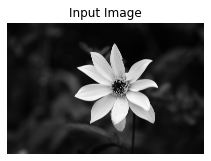

In [4]:
# Display the original image
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.axis('off')

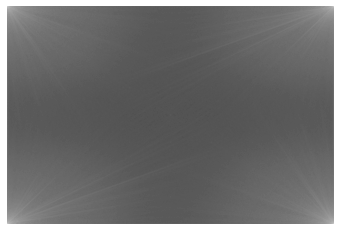

In [5]:
# image in frequency domain
F = np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F)), 
           cmap='gray')
plt.axis('off')
plt.show()

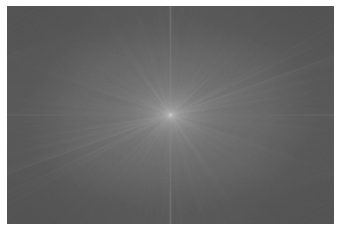

In [6]:
Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

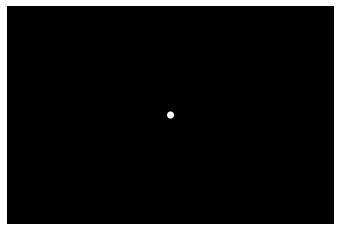

In [7]:
# Filter: Low pass filter
M,N = img.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
            
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

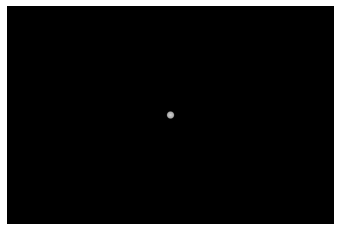

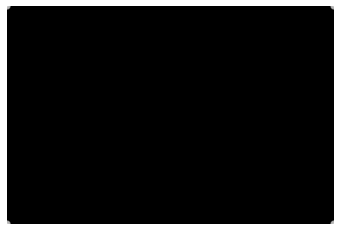

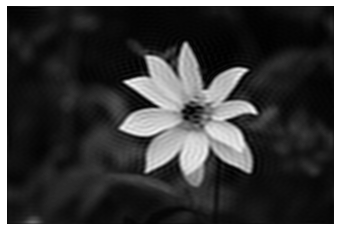

In [8]:
# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

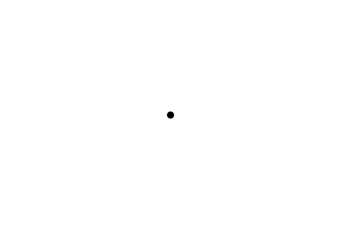

In [9]:
# Filter: High pass filter
H = 1 - H

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

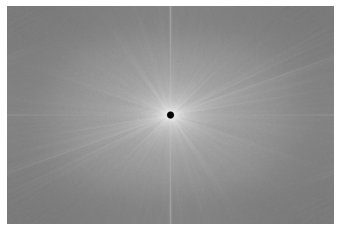

In [10]:
# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

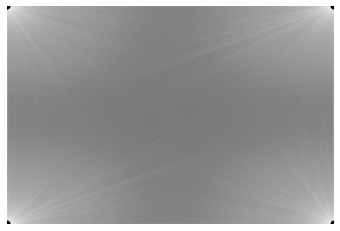

In [11]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

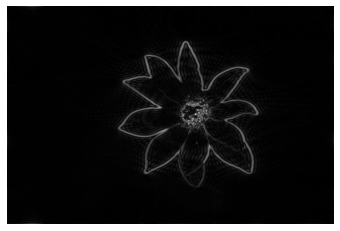

In [12]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

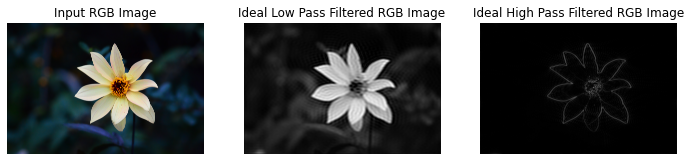

In [2]:
image = cv2.imread('img6.jpg', cv2.IMREAD_COLOR)

# Convert the RGB image to grayscale
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the 2D Fourier Transform of the grayscale image
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)

# Create a mesh grid for the frequency domain image
rows, cols = img_gray.shape
crow, ccol = rows // 2, cols // 2
x = np.linspace(0, cols - 1, cols) - ccol
y = np.linspace(0, rows - 1, rows) - crow
X, Y = np.meshgrid(x, y)

# Compute the distance from the center of the frequency domain
D = np.sqrt(X**2 + Y**2)

# Define the cutoff frequency for the filters
d0_low = 50
d0_high = 50

# Create masks for the filters
H_low = np.zeros((rows, cols))
H_low[D <= d0_low] = 1

H_high = np.ones((rows, cols))
H_high[D <= d0_high] = 0

# Apply the filters in the frequency domain for each channel separately
filtered_channels_low = []
filtered_channels_high = []
for i in range(3):
    f_channel = fshift
   
    fshift_low_channel = f_channel * H_low
    fshift_high_channel = f_channel * H_high
   
    f_low_channel = np.fft.ifftshift(fshift_low_channel)
    f_high_channel = np.fft.ifftshift(fshift_high_channel)
   
    img_low_channel = np.abs(np.fft.ifft2(f_low_channel))
    img_high_channel = np.abs(np.fft.ifft2(f_high_channel))
   
    filtered_channels_low.append(img_low_channel)
    filtered_channels_high.append(img_high_channel)

# Combine the filtered channels back into an RGB image
img_low_filtered = np.stack(filtered_channels_low, axis=-1).astype(np.uint8)
img_high_filtered = np.stack(filtered_channels_high, axis=-1).astype(np.uint8)

# Display the original RGB image and filtered RGB images
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input RGB Image'), plt.axis('off')

plt.subplot(132), plt.imshow(cv2.cvtColor(img_low_filtered, cv2.COLOR_BGR2RGB))
plt.title('Ideal Low Pass Filtered RGB Image'), plt.axis('off')

plt.subplot(133), plt.imshow(cv2.cvtColor(img_high_filtered, cv2.COLOR_BGR2RGB))
plt.title('Ideal High Pass Filtered RGB Image'), plt.axis('off')

plt.show()
